In [4]:
from google.colab import files
 
 
uploaded = files.upload()

Saving gender_submission.csv to gender_submission (1).csv


In [3]:
from google.colab import files
 
 
uploaded = files.upload()

Saving train.csv to train (1).csv


In [5]:
from google.colab import files
 
 
uploaded = files.upload()

Saving test.csv to test.csv


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sy
from sympy import symbols, cos, diff
import math as mth

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender = pd.read_csv("gender_submission.csv")

In [37]:
x1 = train['Sex']
x2 = train['Age']
x3 = train['SibSp']
x4 = train['Parch']
x5 = train['Fare']
y = train['Survived']

In [38]:
def grad_fun1(w1, w3, w4, w5):
    k = 0.0
    for i in range (0,891):
        k += (w1*x1[i] + w3*x3[i] + w4*x4[i] + w5*x5[i] - y[i])
    return k/(len(train))

def grad_fun3(w1, w3, w4, w5):
    k = 0.0
    for i in range (0,891):
        k += (w1*x1[i] + w3*x3[i] + w4*x4[i] + w5*x5[i] - y[i])*x3[i]
    return k/(len(train))
def grad_fun4(w1, w3, w4, w5):
    k = 0.0
    for i in range (0,891):
        k += (w1*x1[i] + w3*x3[i] + w4*x4[i] + w5*x5[i] - y[i])*x4[i]
    return k/(len(train))
def grad_fun5(w1, w3, w4, w5):
    k = 0.0
    for i in range (1,891):
        k += (w1*x1[i] + w3*x3[i] + w4*x4[i] + w5*x5[i] - y[i])*x5[i]
    return k/(len(train))

In [39]:
x = 0.0001
w1 = 1.000
w3 = 1
w4 = 1
w5 = 1

for i in range (1, 2000):
    w1 = w1 - x*grad_fun1(w1, w3, w4, w5)
    w3 = w3 - x*grad_fun3(w1, w3, w4, w5)
    w4 = w4 - x*grad_fun4(w1, w3, w4, w5)
    w5 = w5 - x*grad_fun5(w1, w3, w4, w5)

In [40]:
x1t = test['Sex']
x3t = test['SibSp']
x4t = test['Parch']
x5t = test['Fare']
yt = gender['Survived']
h = yt
for i in range(1,417):
  a=x1t[i]
  b=x3t[i]
  c=x4t[i]
  d=x5t[i]
  h[i] = a*w1 + b*w3 + c*w4 + d*w5


891


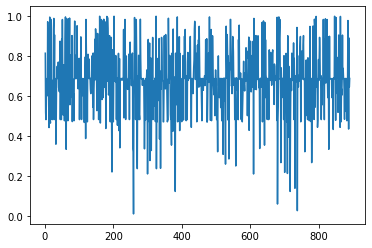

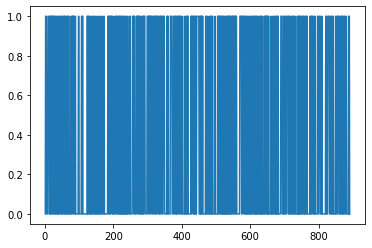

In [13]:
x = train['PassengerId']
z = [0]*891
k = [0]*891
print(len(z))
for i in range(0,891):
  z[i] = x1[i]*w1 + x3[i]*w3 + x4[i]*w4 + x5[i]*w5
  k[i] = 1/(1+mth.exp(-z[i]))

u = train['Survived'] 
plt.plot(x,k)
plt.show()
plt.plot(x,u)
plt.show()

In [27]:
a = 0
p = gender['Survived'] 
d = [0]*418
r = [0]*418
flag = [0]*418

for i in range(0,418):
  d[i] = x1t[i]*w1 + x3t[i]*w3 + x4t[i]*w4 + x5t[i]*w5
  r[i] = 1/(1+mth.exp(-d[i]))
  if r[i]<0.7:
    flag[i]=0
  elif r[i]>=0.7:
    flag[i]=1

for i in range(0,418):
  if flag[i]==p[i]:
    a=a+1
print("accuracy is", a/418*100,"percent")

accuracy is 32.057416267942585 percent


In [28]:
#Arpit
x1=1
x3=0
x4=0
x5=7.5

d = x1*w1 + x3*w3 + x4*w4 + x5*w5
r = 1/(1+mth.exp(-d))

if r<0.7:
  print("dead")
elif r>=0.7:
  print("alive")


dead


In [29]:
#Shreya
x1=0
x3=1
x4=1
x5=512

d = x1*w1 + x3*w3 + x4*w4 + x5*w5
r = 1/(1+mth.exp(-d))

if r<0.7:
  print("dead")
elif r>=0.7:
  print("alive")

dead
